<a href="https://colab.research.google.com/github/Onyimatics/nlp_tweets_classification/blob/master/NLP_Best_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !kill -9 -1
!pip install emoji
# !pip install textblob
# !pip install better_profanity
!pip install contractions
# !pip install fasttext
# !pip install optuna
# !pip install lime
# !pip install gensim
# !pip install wordsegment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import re
import string
import html
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.colors as mcolors

# libraries for data preprocessing
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import spacy
import emoji
import contractions
# from better_profanity import profanity
# from textblob import TextBlob

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# libraries for ML algorithms
# from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree

# download modules available with NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
# Reading the train and test dataset
tweet_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1KplvwpbpA-Mi3QB3xy5myvmmYuq6fRnp')
test_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1VvLBWXH_ZVVVl-Y6dod-gXMAUWkrT03C')

In [ ]:
print(tweet_df.shape)
tweet_df.head()

(13240, 3)


,id,tweet,label
0,86426,@USER She should ask a few native Americans wh...,UNT
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN
2,16820,Amazon is investigating Chinese employees who ...,NOT
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [ ]:
# drop the rows where at least one element is missing
tweet_df = tweet_df.dropna()

print(f'Number of entries: {len(tweet_df)}')

Number of entries: 13240


#EDA

<ipython-input-6-312142616b07>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=label_df.index, y='Count', data=label_df, palette=palette)


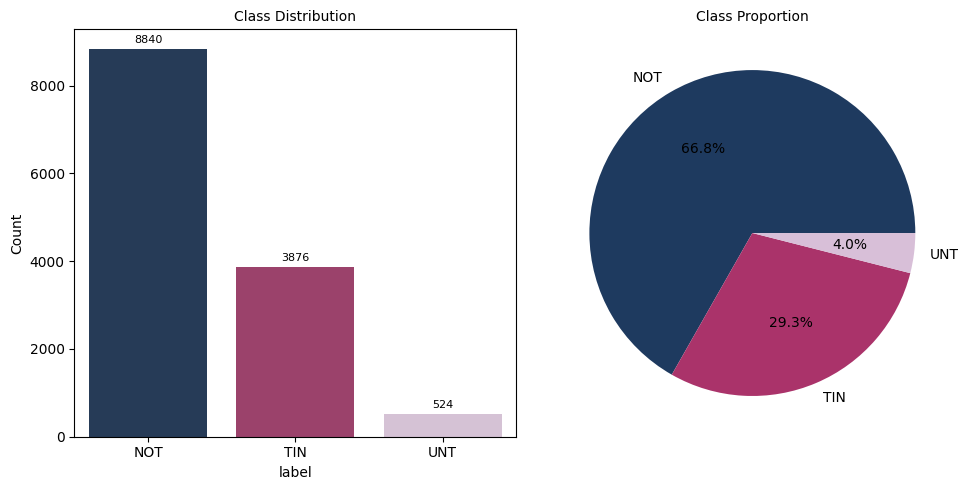

In [ ]:
# Summarise class details
# sns.countplot(x=tweet_df['label'])

# Define custom color palette for consistency
palette = ['#1e3a5f', '#AA336A', '#D8BFD8']

# Create a DataFrame to hold label counts and percentages
label_df = tweet_df['label'].value_counts().to_frame(name='Count')
label_df['Percentage'] = (label_df['Count'] / tweet_df.shape[0] * 100).round(2)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# ---- Left Plot: Bar Plot for Class Distribution ----
plt.subplot(121)
bars = sns.barplot(x=label_df.index, y='Count', data=label_df, palette=palette)
for b in bars.patches:
    x = b.get_x() + (b.get_width() / 2)
    y = b.get_height()
    bars.annotate(f'{int(y)}', xy=(x, y), ha='center', va='center', size=8, xytext=(0, 6), textcoords='offset points')
plt.title('Class Distribution', fontsize=10)

# ---- Right Plot: Pie Chart for Class Proportion ----
plt.subplot(122)
plt.pie(label_df['Percentage'], labels=label_df.index, autopct='%1.1f%%', colors=palette)
plt.title('Class Proportion', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<ipython-input-7-89a767c77620>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=palette)


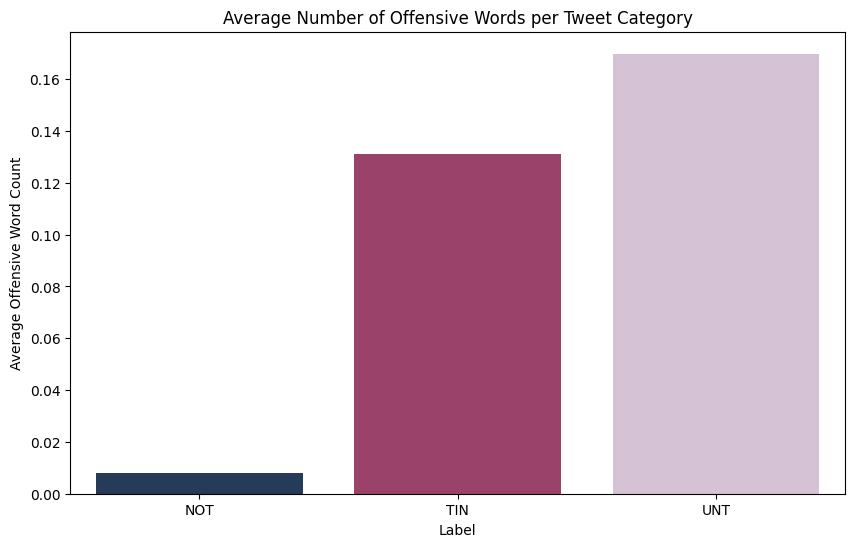

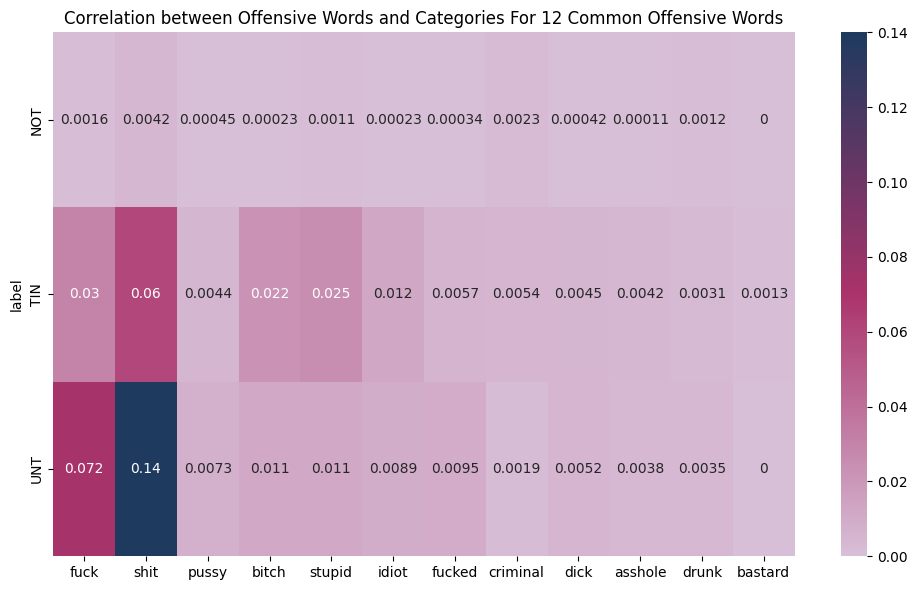

In [ ]:
# Explicit Offensive Word Frequency Analysis (with array)
offensive_words = [
    "fuck", "shit", "pussy", "bitch", "stupid", "idiot", "fucked", "criminal", "dick",#Add more words
     "asshole", "drunk", "bastard", "slut", "cuck", "cunt", "faggot", #Expanded list
    "whore", "twat", "motherfucker", "douchebag", "retard", "slut", "skank", "f***ing", "f**ked", "F*******" "B******"  #Further expansion
]

def count_offensive_words(text):
    words = text.split()
    count = sum([1 for word in words if word in offensive_words])
    return count

tweet_df['offensive_word_count'] = tweet_df['tweet'].apply(count_offensive_words)

# plt.figure(figsize=(20, 5))
# # Bar Chart of Average Offensive Word Count by Category
colors = ['#D8BFD8', '#AA336A', '#1e3a5f']
grouped_data = tweet_df.groupby('label')['offensive_word_count'].mean()
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors)

# plt.subplot(121)
# Bar Chart of Average Offensive Word Count by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=palette)
# sns.barplot(x=label_df.index, y='Count', data=label_df, palette=palette)
plt.title('Average Number of Offensive Words per Tweet Category')
plt.xlabel('Label')
plt.ylabel('Average Offensive Word Count')
plt.show()

# Heatmap of Offensive Word Correlation with Categories (Example - Top 10 words)
# Vectorize the text data
vectorizer = TfidfVectorizer(vocabulary=offensive_words[:12])  # Using top 10 for example
X = vectorizer.fit_transform(tweet_df['tweet']).toarray()
word_counts_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Concatenate with the labels
word_counts_df = pd.concat([tweet_df['label'], word_counts_df], axis=1)

# Group by label and calculate the mean word count for each category
grouped_data = word_counts_df.groupby('label').mean()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
# plt.subplot(122)
sns.heatmap(grouped_data, annot=True, cmap=cmap)
plt.title('Correlation between Offensive Words and Categories For 12 Common Offensive Words')
plt.tight_layout()
plt.show()

It will be good to visualise the most common words on the dataset. This will give me a good idea on the type of preprocessing techniques I need to implement. I will use WordCloud to do that.

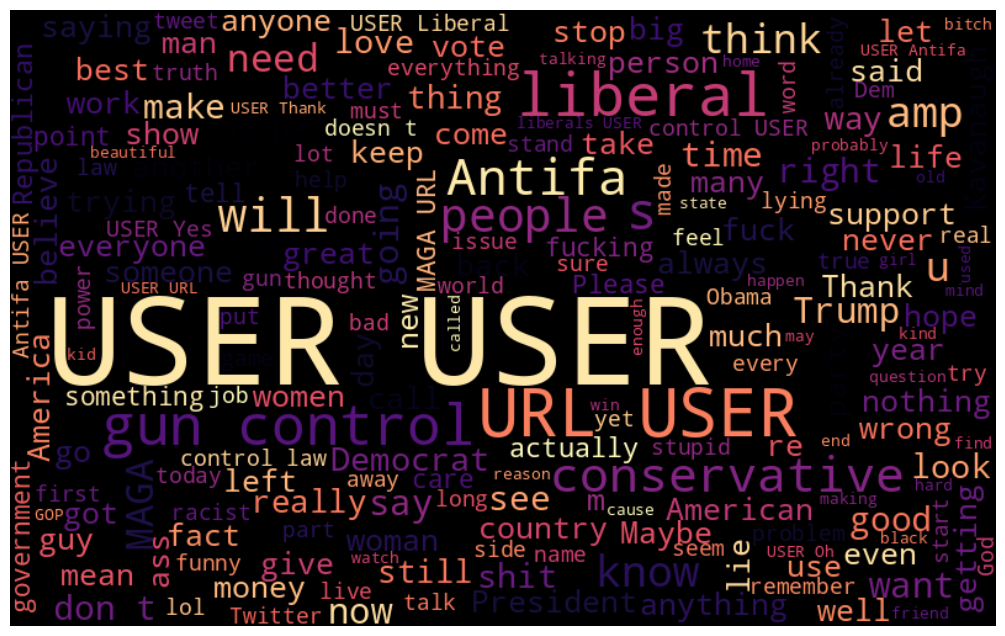

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in tweet_df['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, colormap='magma', height=500, random_state=RANDOM_SEED, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##DATA PREPROCESSING

In [ ]:
# Initialize TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

# Function to clean and tokenize a tweet
def tokenise_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#(\w+)', lambda m: m.group(1).lower(), text)
    text = contractions.fix(text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = tweet_tokenizer.tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token not in string.punctuation]
    return ' '.join(tokens)  # Merge tokens back into a sentence

# Apply preprocessing to the DataFrame
tweet_df['tokenised_tweet'] = tweet_df['tweet'].apply(tokenise_tweet)
test_df['tokenised_tweet'] = test_df['tweet'].apply(tokenise_tweet)

tweet_df.head()

,id,tweet,label,offensive_word_count,tokenised_tweet
0,86426,@USER She should ask a few native Americans wh...,UNT,0,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,0,go home you are drunk maga trump 2020 oncoming...
2,16820,Amazon is investigating Chinese employees who ...,NOT,0,amazon is investigating chinese employees who ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,1,someone should'vetaken this piece of shit to a...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,0,obama wanted liberals illegals to move into re...


In [ ]:
test_df.head()

,id,tweet,tokenised_tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,whoisq wherestheserver dumpnike declasfisa dem...
1,27014,"#ConstitutionDay is revered by Conservatives, ...",constitutionday is revered by conservatives ha...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,foxnews nra maga potus trump 2ndamendment rnc ...
3,13876,#Watching #Boomer getting the news that she is...,watching boomer getting the news that she is s...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,nopasaran unity demo to oppose the far-right i...


In [ ]:
def spacy_lemmatize_text(text):
    # lemm = nlp(text)
    # return ' '.join([token.lemma_ for token in lemm])
    doc = nlp(text)
    # Extract lemmatized tokens and join them with a space
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization
tweet_df['spacy_lemmatised_tweet'] = tweet_df['tokenised_tweet'].apply(spacy_lemmatize_text)
test_df['spacy_lemmatised_tweet'] = test_df['tokenised_tweet'].apply(spacy_lemmatize_text)

tweet_df.head()

,id,tweet,label,offensive_word_count,tokenised_tweet,spacy_lemmatised_tweet
0,86426,@USER She should ask a few native Americans wh...,UNT,0,she should ask a few native americans what the...,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,0,go home you are drunk maga trump 2020 oncoming...,go home you be drunk maga trump 2020 oncoming_...
2,16820,Amazon is investigating Chinese employees who ...,NOT,0,amazon is investigating chinese employees who ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,1,someone should'vetaken this piece of shit to a...,someone should'vetaken this piece of shit to a...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,0,obama wanted liberals illegals to move into re...,obama want liberal illegal to move into red state


In [ ]:
test_df.head()

,id,tweet,label,tokenised_tweet,wordNet_lemmatised_tweet,spacy_lemmatised_tweet
0,86426,USER She should ask a few native Americans wha...,UNT,she should ask a few native americans what the...,she should ask a few native americans what the...,she should ask a few native americans what the...
1,90194,USER USER Go home youre drunk USER MAGA Trump2...,TIN,go home you re drunk maga trump 2020 👊 🇺🇸 👊 url,go home you re drink maga trump 2020 👊 🇺🇸 👊 url,go home you re drunk maga trump 2020 👊 🇺 🇸 👊...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon be investigate chinese employees who be...,amazon be investigate chinese employee who be ...
3,62688,USER Someone shouldveTaken this piece of shit ...,UNT,someone shouldvetaken this piece of shit to a ...,someone shouldvetaken this piece of shit to a ...,someone shouldvetaken this piece of shit to a ...
4,43605,USER USER Obama wanted liberals amp illegals t...,NOT,obama wanted liberals illegals to move into re...,obama want liberals illegals to move into red ...,obama want liberal illegal to move into red state


##SPLITTING DATA INTO TRAINING AND TESTING

In [ ]:
# # Customize stop words
stop_words = set(stopwords.words('english'))
words_to_keep = ['not', 'no', 'nor', 'neither', 'never', 'against', "n't"]
stop_words = stop_words - set(words_to_keep)
custom_stop_words = ['url', 'maga', 'rt', 'amp']
stop_words = stop_words.union(set(custom_stop_words))


# use tokenised text
X_train_spacy_lemmatised_tweet, X_val_spacy_lemmatised_tweet, y_train, y_val = train_test_split(tweet_df['spacy_lemmatised_tweet'], tweet_df['label'], test_size=0.3, random_state=RANDOM_SEED, stratify=tweet_df['label'])
print(f'training data set size: {len(X_train_spacy_lemmatised_tweet)}')
print(f'validation data set size: {len(X_val_spacy_lemmatised_tweet)}')

training data set size: 9268
validation data set size: 3972


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=list(stop_words))

vectorizer.fit(tweet_df['spacy_lemmatised_tweet'])
X_tfidf = vectorizer.transform(tweet_df['spacy_lemmatised_tweet'])  # Convert to numerical features

y = tweet_df['label']  # Target variable

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE BEFORE splitting data
smote = SMOTE(sampling_strategy='auto', random_state=RANDOM_SEED)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Print class distributions before and after resampling
print(f"Original class distribution: {dict(Counter(y))}")
print(f"Resampled class distribution: {dict(Counter(y_resampled))}")

# Split the balanced dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=RANDOM_SEED)

print(f"Training dataset size: {X_train.shape[0]}")
print(f"Validation dataset size: {X_val.shape[0]}")
# tweet_df.head()


Original class distribution: {'UNT': 524, 'TIN': 3876, 'NOT': 8840}
Resampled class distribution: {2: 8840, 1: 8840, 0: 8840}
Training dataset size: 18564
Validation dataset size: 7956


In [ ]:
tweet_df.head()

,id,tweet,label,tokenised_tweet,spacy_lemmatised_tweet
0,86426,@USER She should ask a few native Americans wh...,UNT,she should ask a few native americans what the...,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home you are drunk maga trump 2020 oncoming...,go home you be drunk maga trump 2020 oncoming_...
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...,amazon be investigate chinese employee who be ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,someone should'vetaken this piece of shit to a...,someone should'vetaken this piece of shit to a...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals illegals to move into re...,obama want liberal illegal to move into red state


<ipython-input-15-4b21c4b0f197>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_before = sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=axes[0], palette=palette)
<ipython-input-15-4b21c4b0f197>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_after = sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), ax=axes[1], palette=palette)


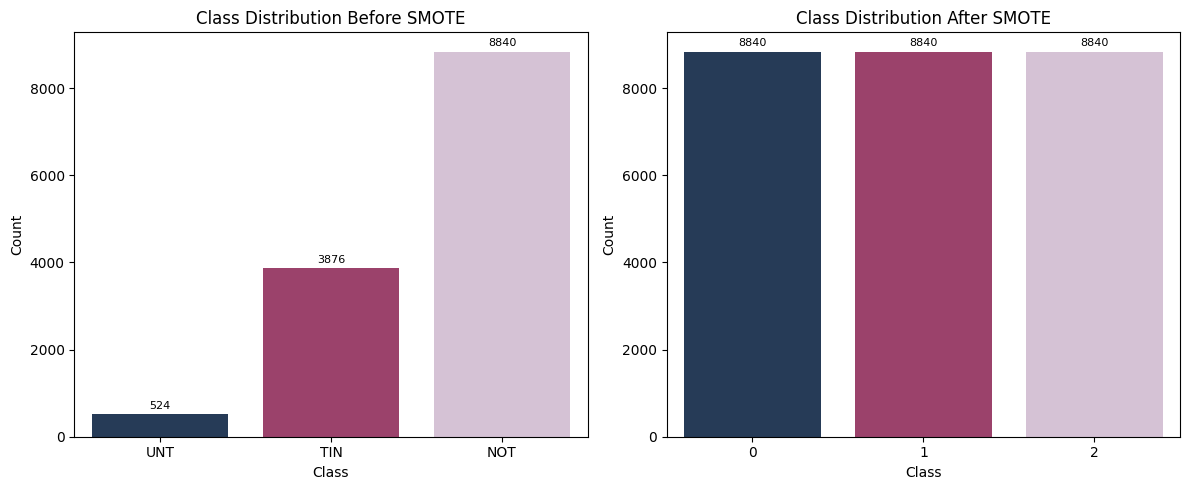

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

# Original class distribution
y = tweet_df['label']
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)

# Define custom color palette for consistency
palette = ['#1e3a5f', '#AA336A', '#D8BFD8']

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Left Plot: Before SMOTE ----
bars_before = sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=axes[0], palette=palette)
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
for b in bars_before.patches:
    x = b.get_x() + (b.get_width() / 2)
    y = b.get_height()
    axes[0].annotate(f'{int(y)}', xy=(x, y), ha='center', va='center', size=8, xytext=(0, 6), textcoords='offset points')

# ---- Right Plot: After SMOTE ----
bars_after = sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), ax=axes[1], palette=palette)
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
for b in bars_after.patches:
    x = b.get_x() + (b.get_width() / 2)
    y = b.get_height()
    axes[1].annotate(f'{int(y)}', xy=(x, y), ha='center', va='center', size=8, xytext=(0, 6), textcoords='offset points')


plt.tight_layout()
plt.show()


Accuracy: 0.9115133232780291

Classification Report:
               precision    recall  f1-score   support

         NOT       0.84      0.94      0.88      2704
         TIN       0.93      0.80      0.86      2617
         UNT       0.98      0.99      0.99      2635

    accuracy                           0.91      7956
   macro avg       0.92      0.91      0.91      7956
weighted avg       0.92      0.91      0.91      7956



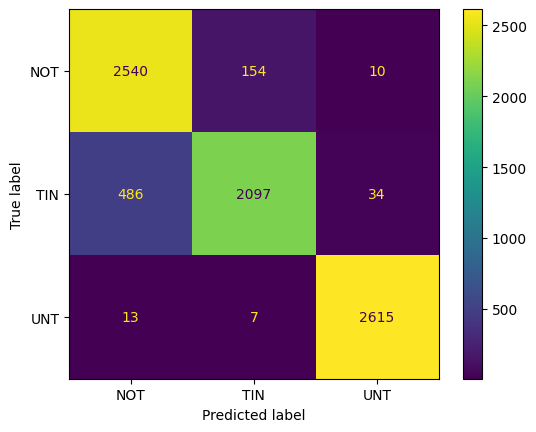

In [ ]:

et = ExtraTreesClassifier(random_state=RANDOM_SEED)
et.fit(X_train, y_train)

# Make predictions
y_pred = et.predict(X_val)

# Decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_val_decoded = label_encoder.inverse_transform(y_val)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_val_decoded, y_pred_decoded)}")
print("\nClassification Report:\n", classification_report(y_val_decoded, y_pred_decoded, target_names=label_encoder.classes_))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val_decoded, y_pred_decoded, labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In [ ]:
# Transform test data
X_test = vectorizer.transform(test_df['spacy_lemmatised_tweet'])

# Make predictions using the best model
predictions_encoded = et.predict(X_test)

# Decode predictions back to original labels (NOT, TIN, UNT)
test_df['label'] = label_encoder.inverse_transform(predictions_encoded)

# Save only 'id' and 'prediction' columns
test_df[['id', 'label']].to_csv('/content/test-predictions.csv', index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


### **SUMMARY**

|Model | Data Preprocessing | Features   |Accuracy Before SMOTE |Accuracy After SMOTE|
|------|--------------------|------------|----------------|----------|
|SVM    |lemmatisation(SpaCy), stop word removal | tf-idf vector(2-grams) | 74.82% | 86.15% |
|Logistic Regression    |lemmatisation(wordNet), stop word removal | tf-idf vector(2-grams) | 74.27% | 85.73% |
|Random Forest    |lemmatisation(SpaCy), stop word removal  | tf-idf vector(2-grams) | 74.92% | 88.84%
|ExtraTrees Classifier    |lemmatisation(SpaCy), stop word removal | - | 75%(CountVectorizer) | 91.15%(tf-idf vector(2-grams))
